<a href="https://colab.research.google.com/github/ashrotd/AIClassifierModel/blob/main/LinearRegression%26LogisticPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
#Design a model
#construct loss and optimizer
#trainig looop
# - forward pass: compute predictin and loss
#- backward pass: gradients
#- update weights

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [163]:
x_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise =20,random_state=1)

In [164]:
X = torch.from_numpy(x_numpy.astype(np.float32))
Y = torch.from_numpy(y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0],1)

In [170]:
n_samples,n_features = X.shape

In [171]:
 input_size=n_features
 output_size = 1

In [172]:
model = nn.Linear(input_size,output_size)

In [173]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

epochs : 1, losss: 5645.9434
epochs : 11, losss: 4185.6377
epochs : 21, losss: 3129.1946
epochs : 31, losss: 2364.0969
epochs : 41, losss: 1809.4438
epochs : 51, losss: 1406.9797
epochs : 61, losss: 1114.6968
epochs : 71, losss: 902.2642
epochs : 81, losss: 747.7555
epochs : 91, losss: 635.3020


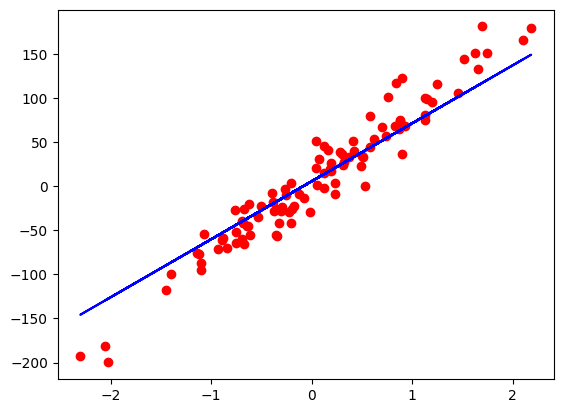

In [174]:
for epochs in range(100):
  y_pred = model(X)
  loss = criterion(y_pred,Y)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epochs%10==0:
    print(f'epochs : {epochs+1}, losss: {loss.item():.4f}')

predict = model(X).detach().numpy()
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predict,'b')
plt.show()

In [175]:
#Logistic Regression
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [176]:
#Prepare the data
bc = datasets.load_breast_cancer()
x,y = bc.data,bc.target
n_samples,n_features = x.shape


In [177]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=1234)

In [132]:
x_train.shape

(455, 30)

In [178]:
#Scale our features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [179]:

X_train = torch.from_numpy(x_train.astype(np.float32))
X_test = torch.from_numpy(x_test.astype(np.float32))
Y_train = torch.from_numpy(y_train.astype(np.float32))
Y_test = torch.from_numpy(y_test.astype(np.float32))

In [180]:
Y_train = Y_train.view(Y_train.shape[0],1)
Y_test = Y_test.view(Y_test.shape[0],1)

In [136]:
X_test.shape

torch.Size([114, 30])

In [181]:
class logisticModel(nn.Module):
  def __init__(self,input_dims,output_dims):
    super(logisticModel,self).__init__()

    self.linear_model = nn.Linear(input_dims,output_dims)

  def forward(self,x):
    y_pred = torch.sigmoid(self.linear_model(x))
    return y_pred

In [182]:
model = logisticModel(n_features,1)

In [183]:
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [105]:
X_test

In [184]:
for epochs in range(1000):
  y_pred = model.forward(X_train)
  l = loss(y_pred,Y_train)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epochs%10==0:
    print(f'Epochs: {epochs+1}, loss: {l.item():.4f}')
  
with torch.no_grad():
  Predicted = model(X_test)

  Predicted_classs = Predicted.round()
  accuracy = Predicted_classs.eq(Y_test).sum()/float(Y_test.shape[0])
  print(f'accuracy=={accuracy:.4f}')


Epochs: 1, loss: 0.7763
Epochs: 11, loss: 0.5874
Epochs: 21, loss: 0.4797
Epochs: 31, loss: 0.4133
Epochs: 41, loss: 0.3685
Epochs: 51, loss: 0.3357
Epochs: 61, loss: 0.3106
Epochs: 71, loss: 0.2904
Epochs: 81, loss: 0.2738
Epochs: 91, loss: 0.2597
Epochs: 101, loss: 0.2476
Epochs: 111, loss: 0.2371
Epochs: 121, loss: 0.2278
Epochs: 131, loss: 0.2196
Epochs: 141, loss: 0.2121
Epochs: 151, loss: 0.2054
Epochs: 161, loss: 0.1993
Epochs: 171, loss: 0.1936
Epochs: 181, loss: 0.1885
Epochs: 191, loss: 0.1837
Epochs: 201, loss: 0.1793
Epochs: 211, loss: 0.1751
Epochs: 221, loss: 0.1713
Epochs: 231, loss: 0.1677
Epochs: 241, loss: 0.1643
Epochs: 251, loss: 0.1611
Epochs: 261, loss: 0.1582
Epochs: 271, loss: 0.1553
Epochs: 281, loss: 0.1527
Epochs: 291, loss: 0.1501
Epochs: 301, loss: 0.1477
Epochs: 311, loss: 0.1455
Epochs: 321, loss: 0.1433
Epochs: 331, loss: 0.1412
Epochs: 341, loss: 0.1393
Epochs: 351, loss: 0.1374
Epochs: 361, loss: 0.1356
Epochs: 371, loss: 0.1339
Epochs: 381, loss: 0.13